# Project: Wrangling and Analyze Data

## Gathering Data

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#WeRateDogs Twitter archive data
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
#check if url is responsive
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# download the tweet image prediction with request library
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
twitter_prediction = pd.read_csv('image-predictions.tsv', sep ='\t')

In [6]:
consumer_key = 'tiwNkXvD7JpyMHkesNqdPU0XB'
consumer_secret = 'CnSkBmq6LjVFoA0xgCl9d3MfexZIH7hfga5xfXHERVUGEhXzSy'
access_token = '984774225797017601-sw5UmwPaB9eYkcBJrMiPjnJ4q95sNPz'
access_secret = 'KG8aFE8GMeuJufOqYmuvic5Z4oEXRPIAAl0j0uGfOknvX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Read tweets via Twitter API
tweets = []

for tweet in twitter_archive['tweet_id']:
    try:
        tweets.append(api.get_status(tweet))
    except Exception as e:
        print('Unable to load data for tweet id:', tweet)

Unable to load data for tweet id: 888202515573088257
Unable to load data for tweet id: 873697596434513921
Unable to load data for tweet id: 872668790621863937
Unable to load data for tweet id: 872261713294495745
Unable to load data for tweet id: 869988702071779329
Unable to load data for tweet id: 866816280283807744
Unable to load data for tweet id: 861769973181624320
Unable to load data for tweet id: 856602993587888130
Unable to load data for tweet id: 856330835276025856
Unable to load data for tweet id: 851953902622658560
Unable to load data for tweet id: 851861385021730816
Unable to load data for tweet id: 845459076796616705
Unable to load data for tweet id: 844704788403113984
Unable to load data for tweet id: 842892208864923648
Unable to load data for tweet id: 837366284874571778
Unable to load data for tweet id: 837012587749474308
Unable to load data for tweet id: 829374341691346946
Unable to load data for tweet id: 827228250799742977
Unable to load data for tweet id: 812747805718

Rate limit reached. Sleeping for: 174


Unable to load data for tweet id: 754011816964026368
Unable to load data for tweet id: 680055455951884288


Rate limit reached. Sleeping for: 156


In [8]:
# Display the number of tweets downloaded
print('Number of tweets successfully downloaded: ', len(tweets))

Number of tweets successfully downloaded:  2327


In [9]:
# Store the tweet JSON data in a list and save the list to tweet_json.txt
tweet_json = []
for tweet in tweets:
    tweet_json.append(tweet._json)

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweet_json, indent=4))

In [10]:
#Use the Tweepy library to query additional data via the Twitter API 
tweet_array = []
with open('tweet_json.txt', encoding='utf-8') as json_file:
    data_json = json.load(json_file)
    for tweet in data_json:
        tweet_id = tweet['id']
        only_tweet =tweet['text']
        url = only_tweet[only_tweet.find('https'):]
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        tweet_array.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                            })
        tweet_json = pd.DataFrame(tweet_array, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'url'])

## Assessing Data

In [11]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

timestamp has a datatype object instead of datetime

In [13]:
twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

Name column has some values that are not names, these values begin with lower case character

In [14]:
twitter_archive['timestamp'].unique()

array(['2017-08-01 16:23:56 +0000', '2017-08-01 00:17:27 +0000',
       '2017-07-31 00:18:03 +0000', ..., '2015-11-15 23:21:54 +0000',
       '2015-11-15 23:05:30 +0000', '2015-11-15 22:32:08 +0000'],
      dtype=object)

values in timestamp has extra +0000 

In [15]:
twitter_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
twitter_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
sum(twitter_prediction.duplicated('jpg_url'))

66

> jpg_url has 66 duplicated values

In [18]:
twitter_prediction['p1_dog'].unique()

array([ True, False])

In [19]:
twitter_prediction['p2_dog'].unique()

array([ True, False])

In [20]:
twitter_prediction['p3_dog'].unique()

array([ True, False])

False values in p1, p2, and p3 are possibly not dogs.

In [21]:
twitter_prediction['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [22]:
twitter_prediction['p2'].unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [23]:
twitter_prediction['p3'].unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

some p1, p2, p3 values have underscore (_) in betweeen them

In [24]:
tweet_json

,tweet_id,favorite_count,retweet_count,url
0,892420643555336193,33778,6995,https://t.co/MgUWQ76dJU
1,892177421306343426,29299,5295,https://t.co/aQFSeaCu9L
2,891815181378084864,22029,3475,https://t.co/r0YlrsGCgy
3,891689557279858688,36893,7217,https://t.co/tD36da7qLQ
4,891327558926688256,35274,7747,https://t.co/0g0KMIVXZ3
...,...,...,...,...
2322,666049248165822465,88,36,https://t.co/4B7cOc1EDq
2323,666044226329800704,247,115,https://t.co/DWnyCjf2mx
2324,666033412701032449,100,36,https://t.co/y671yMhoiR
2325,666029285002620928,112,39,https://t.co/r7mOb2m0UI


In [25]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   favorite_count  2327 non-null   int64 
 2   retweet_count   2327 non-null   int64 
 3   url             2327 non-null   object
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


data type for tweet_id is object

In [26]:
sum(tweet_json.duplicated('url'))

158

> url has 158 duplicate values

#### Quality Issues
 ##### twitter_archive table: 
 - tweet_id column should be object
 - Retweet and replies would be deleted, only original ratings would be left 
 - Some columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) are not useful for this analysis.
 - Name column contains values that are not actually name ( values like none, a, an etc.)
 - Timestamp data type is object instead of time
 - Timestamp have extra "+0000"

##### twitter_prediction table:
- p1_dog, p2_dog, p3_dog values that are false are not dog
- p1, p2, p3 values contains underscore ('_')
- jpg_url has duplicated values

##### tweet_json table:
- url has duplicate values       


#### Tidiness Issues

- Columns doggo, flooper, pupper and puppo in twitter_prediciton table should be merged as a single column 
- Image prediction (p1, p2, p3) should be merged as a single column 
- Merge the 3 dataframes

## Cleaning Data

In [72]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 0 to 2325
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1384 non-null   int64         
 1   timestamp           1384 non-null   datetime64[ns]
 2   expanded_urls       1384 non-null   object        
 3   rating_numerator    1384 non-null   int64         
 4   rating_denominator  1384 non-null   int64         
 5   name                1384 non-null   object        
 6   doggo               1384 non-null   object        
 7   floofer             1384 non-null   object        
 8   pupper              1384 non-null   object        
 9   puppo               1384 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 118.9+ KB


In [27]:
# Create copies of dataframe
twitter_archive_clean = twitter_archive.copy()
twitter_prediction_clean = twitter_prediction.copy()
tweet_json_clean = tweet_json.copy()

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [29]:
twitter_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   favorite_count  2327 non-null   int64 
 2   retweet_count   2327 non-null   int64 
 3   url             2327 non-null   object
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


#### Quality Issues - Twitter_archive table

###### Number 1
###### Define

Change data type of tweet_id from int to object


###### Code

In [73]:
twitter_archive_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('object')
twitter_prediction_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('object')

In [74]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 0 to 2325
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1294 non-null   object        
 1   timestamp           1384 non-null   datetime64[ns]
 2   expanded_urls       1384 non-null   object        
 3   rating_numerator    1384 non-null   int64         
 4   rating_denominator  1384 non-null   int64         
 5   name                1384 non-null   object        
 6   doggo               1384 non-null   object        
 7   floofer             1384 non-null   object        
 8   pupper              1384 non-null   object        
 9   puppo               1384 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 118.9+ KB


In [75]:
twitter_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1567 non-null   object
 1   jpg_url     1691 non-null   object
 2   img_num     1691 non-null   int64 
 3   Prediction  1691 non-null   object
 4   breed       1691 non-null   object
dtypes: int64(1), object(4)
memory usage: 79.3+ KB


###### Number 2
###### Define


- Remove retweet and replies leaving only the original tweets.

###### Code

In [31]:
#drop replies
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

In [32]:
#drop retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

###### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

###### Number 3
###### Define

 - Remove columns that are not useful for the analysis

###### Code

In [34]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','text','source'],axis = 1);

###### Test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   expanded_urls       2094 non-null   object
 3   rating_numerator    2097 non-null   int64 
 4   rating_denominator  2097 non-null   int64 
 5   name                2097 non-null   object
 6   doggo               2097 non-null   object
 7   floofer             2097 non-null   object
 8   pupper              2097 non-null   object
 9   puppo               2097 non-null   object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


###### Number 4
###### Define

Remove entries in the name column that are not names.

###### Code

In [36]:
#intial content of the 'name' column
twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [37]:
# Drop empty rows in the name column
twitter_archive_clean.dropna(subset=['name'], inplace=True)

In [38]:
# Drop rows that contain None in the name column
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name != 'None']

In [39]:
#Drop rows that has a lowercase starting the name column
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['name'].str.istitle()]

###### Test

In [40]:
twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',
     

In [41]:
twitter_archive_clean.name.value_counts()

Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
              ..
Shelby         1
Sephie         1
Bonaparte      1
Wishes         1
Christoper     1
Name: name, Length: 924, dtype: int64

###### Number 5
###### Define

Remove extra +0000 from timestamp

###### Code

In [42]:
# Remove +0000 from timestamp column
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str.strip('+0000')

###### Test

In [43]:
twitter_archive_clean.timestamp

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
                ...         
2315    2015-11-17 18:56:35 
2317    2015-11-17 15:51:26 
2318    2015-11-17 03:16:00 
2319    2015-11-17 02:46:43 
2325    2015-11-17 00:53:15 
Name: timestamp, Length: 1384, dtype: object

###### Number 6
###### Define

Change data type of timestamp from object to date

###### Code

In [44]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

###### Test

In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 0 to 2325
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1384 non-null   int64         
 1   timestamp           1384 non-null   datetime64[ns]
 2   expanded_urls       1384 non-null   object        
 3   rating_numerator    1384 non-null   int64         
 4   rating_denominator  1384 non-null   int64         
 5   name                1384 non-null   object        
 6   doggo               1384 non-null   object        
 7   floofer             1384 non-null   object        
 8   pupper              1384 non-null   object        
 9   puppo               1384 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 118.9+ KB


#### Quality Issues - Twitter_prediction table

###### Number 7
###### Define

Drop false dogs (Clean Dog Predictions)

###### Code

In [46]:
twitter_prediction_clean['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [47]:
dog_prediction = ['p1_dog', 'p2_dog', 'p3_dog']
for p in dog_prediction:
    twitter_prediction_clean[p] = twitter_prediction_clean[p].astype(int)
    

In [48]:
twitter_prediction_clean.loc[(twitter_prediction_clean['p1_dog']+twitter_prediction_clean['p2_dog']+twitter_prediction_clean['p3_dog'] == 0),'Prediction'] = 'not dog'
twitter_prediction_clean.loc[(twitter_prediction_clean['p1_dog']+twitter_prediction_clean['p2_dog']+twitter_prediction_clean['p3_dog'] == 1),'Prediction'] = 'mixed'
twitter_prediction_clean.loc[(twitter_prediction_clean['p1_dog']+twitter_prediction_clean['p2_dog']+twitter_prediction_clean['p3_dog'] == 2),'Prediction'] = 'mixed'
twitter_prediction_clean.loc[(twitter_prediction_clean['p1_dog']+twitter_prediction_clean['p2_dog']+twitter_prediction_clean['p3_dog'] == 3),'Prediction'] = 'dog'

In [49]:
twitter_prediction_clean['Prediction'].value_counts()

dog        1243
mixed       508
not dog     324
Name: Prediction, dtype: int64

In [50]:
twitter_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,1,collie,0.156665,1,Shetland_sheepdog,0.061428,1,dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,1,miniature_pinscher,0.074192,1,Rhodesian_ridgeback,0.072010,1,dog
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,1,malinois,0.138584,1,bloodhound,0.116197,1,dog
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,1,redbone,0.360687,1,miniature_pinscher,0.222752,1,dog
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,1,Rottweiler,0.243682,1,Doberman,0.154629,1,dog


In [51]:
# Drop rows that contain None in the name column
twitter_prediction_clean = twitter_prediction_clean[twitter_prediction_clean.Prediction != 'not dog']

###### Test

In [52]:
twitter_prediction_clean['Prediction'].value_counts()

dog      1243
mixed     508
Name: Prediction, dtype: int64

###### Number 8
###### Define

Remove underscore(_) in P1, P2 and P3

###### Code

In [53]:
twitter_prediction_clean['p1'] = twitter_prediction_clean['p1'].str.replace("_"," ")

In [54]:
twitter_prediction_clean['p2'] = twitter_prediction_clean['p2'].str.replace("_"," ")

In [55]:
twitter_prediction_clean['p3'] = twitter_prediction_clean['p3'].str.replace("_"," ")

###### Test

In [56]:
twitter_prediction_clean['p1'].unique()

array(['Welsh springer spaniel', 'redbone', 'German shepherd',
       'Rhodesian ridgeback', 'miniature pinscher',
       'Bernese mountain dog', 'chow', 'shopping cart',
       'miniature poodle', 'golden retriever', 'Gordon setter',
       'Walker hound', 'pug', 'bloodhound', 'Lhasa', 'English setter',
       'Italian greyhound', 'Maltese dog', 'ox', 'malamute',
       'soft-coated wheaten terrier', 'Chihuahua',
       'black-and-tan coonhound', 'toy terrier', 'Blenheim spaniel',
       'Pembroke', 'llama', 'Chesapeake Bay retriever',
       'curly-coated retriever', 'dalmatian', 'Ibizan hound',
       'Border collie', 'Labrador retriever', 'seat belt',
       'miniature schnauzer', 'Airedale', 'hay',
       'West Highland white terrier', 'toy poodle', 'giant schnauzer',
       'vizsla', 'Rottweiler', 'Siberian husky', 'papillon',
       'Saint Bernard', 'Tibetan terrier', 'borzoi', 'beagle', 'hare',
       'Yorkshire terrier', 'Pomeranian', 'web site', 'kuvasz',
       'flat-coated 

In [57]:
twitter_prediction_clean['p2'].unique()

array(['collie', 'miniature pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English springer', 'Tibetan mastiff',
       'shopping basket', 'komondor', 'Yorkshire terrier',
       'English foxhound', 'bull mastiff', 'German shepherd', 'Shih-Tzu',
       'Newfoundland', 'toy terrier', 'toy poodle',
       'Chesapeake Bay retriever', 'Siberian husky', 'Afghan hound',
       'bloodhound', 'papillon', 'cocker spaniel', 'chow',
       'Irish terrier', 'chain saw', 'beagle', 'giant schnauzer',
       'Labrador retriever', 'Pembroke', 'Chihuahua', 'Weimaraner',
       'Brittany spaniel', 'standard schnauzer', 'teddy', 'vizsla', 'pug',
       'Italian greyhound', 'Samoyed', 'Pomeranian', 'miniature poodle',
       'Lakeland terrier', 'Irish setter', 'malamute', 'Border collie',
       'Leonberg', 'French bulldog', 'ice bear', 'Christmas stocking',
       'golden retriever', 'standard poodle', 'dhole', 'kuvasz',
       'Cardigan', 'silky terrier', 'English setter', 'bath towel',
       

In [58]:
twitter_prediction_clean['p3'].unique()

array(['Shetland sheepdog', 'Rhodesian ridgeback', 'bloodhound',
       'miniature pinscher', 'Doberman', 'Greater Swiss Mountain dog',
       'fur coat', 'golden retriever', 'soft-coated wheaten terrier',
       'Labrador retriever', 'Pekinese', 'Ibizan hound', 'French bulldog',
       'malinois', 'Dandie Dinmont', 'borzoi', 'basenji',
       'miniature poodle', 'groenendael', 'Eskimo dog', 'briard',
       'papillon', 'flat-coated retriever', 'Chihuahua', 'Shih-Tzu',
       'Pomeranian', 'dingo', 'power drill', 'Saluki', 'Great Pyrenees',
       'West Highland white terrier', 'collie', 'toy poodle', 'vizsla',
       'giant schnauzer', 'teddy', 'water buffalo', 'seat belt', 'kelpie',
       'Brabancon griffon', 'standard poodle', 'beagle',
       'Irish water spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake Bay retriever', 'black-and-tan coonhound', 'kuvasz',
       'Staffordshire bullterrier', 'Yorkshire terrier',
       'Lakeland terrier', 'weasel', 'ski mask', 'cocker spaniel

###### Number 9
###### Define

Remove duplicate img_url

###### Code

In [59]:
twitter_prediction_clean['jpg_url'].nunique()

1691

In [60]:
twitter_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   int64  
 1   jpg_url     1751 non-null   object 
 2   img_num     1751 non-null   int64  
 3   p1          1751 non-null   object 
 4   p1_conf     1751 non-null   float64
 5   p1_dog      1751 non-null   int32  
 6   p2          1751 non-null   object 
 7   p2_conf     1751 non-null   float64
 8   p2_dog      1751 non-null   int32  
 9   p3          1751 non-null   object 
 10  p3_conf     1751 non-null   float64
 11  p3_dog      1751 non-null   int32  
 12  Prediction  1751 non-null   object 
dtypes: float64(3), int32(3), int64(2), object(5)
memory usage: 171.0+ KB


In [61]:
twitter_prediction_clean.drop_duplicates(subset = 'jpg_url', inplace =True)

###### Test

In [62]:
twitter_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1691 non-null   int64  
 1   jpg_url     1691 non-null   object 
 2   img_num     1691 non-null   int64  
 3   p1          1691 non-null   object 
 4   p1_conf     1691 non-null   float64
 5   p1_dog      1691 non-null   int32  
 6   p2          1691 non-null   object 
 7   p2_conf     1691 non-null   float64
 8   p2_dog      1691 non-null   int32  
 9   p3          1691 non-null   object 
 10  p3_conf     1691 non-null   float64
 11  p3_dog      1691 non-null   int32  
 12  Prediction  1691 non-null   object 
dtypes: float64(3), int32(3), int64(2), object(5)
memory usage: 165.1+ KB


#### Quality Issues - Tweet_json table

###### Number 10
######  Define

Remove duplicate url

###### Code

In [65]:
tweet_json_clean.drop_duplicates(subset = 'url', inplace =True)

###### Test

In [66]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2169 non-null   int64 
 1   favorite_count  2169 non-null   int64 
 2   retweet_count   2169 non-null   int64 
 3   url             2169 non-null   object
dtypes: int64(3), object(1)
memory usage: 84.7+ KB


#### Tidiness Issue
###### Number 1
######  Define

Merge p1, p2, p3 into one column

###### Code

In [67]:
def breed(row):
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row['p3']
    else:
        return np.nan

twitter_prediction_clean['breed'] = twitter_prediction_clean.apply(breed, axis = 1)

In [68]:
twitter_prediction_clean = twitter_prediction_clean.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

###### Test

In [69]:
twitter_prediction_clean.breed

0         Welsh springer spaniel
1                        redbone
2                German shepherd
3            Rhodesian ridgeback
4             miniature pinscher
                  ...           
2069    Chesapeake Bay retriever
2070                      basset
2071          Labrador retriever
2072                   Chihuahua
2073                   Chihuahua
Name: breed, Length: 1691, dtype: object

In [70]:
twitter_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1691 non-null   int64 
 1   jpg_url     1691 non-null   object
 2   img_num     1691 non-null   int64 
 3   Prediction  1691 non-null   object
 4   breed       1691 non-null   object
dtypes: int64(2), object(3)
memory usage: 79.3+ KB


######  Number 2
######  Define
Merge columns doggo, flooper, pupper and puppo as a single column 

######  Code

In [79]:
def stage(row):
    if row['doggo'] == 'doggo' and row['floofer'] == 'None' and row['pupper']== 'None' and row['puppo']== 'None':
        return row['doggo']
    elif row['floofer'] == 'floofer' and row['doggo'] == 'None' and row['pupper']== 'None' and row['puppo']== 'None':
        return row['floofer']
    elif row['pupper']== 'pupper' and row['floofer'] == 'None' and row['doggo']== 'None' and row['puppo']== 'None':
        return row['pupper']
    elif row['puppo']== 'puppo' and row['floofer'] == 'None' and row['pupper']== 'None' and row['doggo']== 'None':
        return row['puppo']
    elif row['puppo']== 'None' and row['floofer'] == 'None' and row['pupper']== 'None' and row['doggo']== 'None':
        return np.nan
    else:
        return 'multiple_stages'

twitter_archive_clean['stage'] = twitter_archive_clean.apply(stage, axis = 1)

In [80]:
twitter_archive_clean.stage.value_counts()

pupper             121
doggo               38
puppo               16
floofer              5
multiple_stages      4
Name: stage, dtype: int64

In [82]:
twitter_archive_clean = twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [83]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 0 to 2325
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1294 non-null   object        
 1   timestamp           1384 non-null   datetime64[ns]
 2   expanded_urls       1384 non-null   object        
 3   rating_numerator    1384 non-null   int64         
 4   rating_denominator  1384 non-null   int64         
 5   name                1384 non-null   object        
 6   stage               184 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 86.5+ KB


###### Number 4
###### Define
Merge the 3 dataframes into a master dataframe

In [84]:
twitter_master = twitter_archive_clean.join(twitter_prediction_clean.set_index('tweet_id'), on='tweet_id')

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [85]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12454 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1294 non-null   object        
 1   timestamp           12454 non-null  datetime64[ns]
 2   expanded_urls       12454 non-null  object        
 3   rating_numerator    12454 non-null  int64         
 4   rating_denominator  12454 non-null  int64         
 5   name                12454 non-null  object        
 6   stage               2029 non-null   object        
 7   jpg_url             11767 non-null  object        
 8   img_num             11767 non-null  float64       
 9   Prediction          11767 non-null  object        
 10  breed               11767 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 1.1+ MB


In [86]:
master_df = twitter_master.join(tweet_json_clean.set_index('tweet_id'), on='tweet_id')

In [87]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12454 entries, 0 to 2325
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1294 non-null   object        
 1   timestamp           12454 non-null  datetime64[ns]
 2   expanded_urls       12454 non-null  object        
 3   rating_numerator    12454 non-null  int64         
 4   rating_denominator  12454 non-null  int64         
 5   name                12454 non-null  object        
 6   stage               2029 non-null   object        
 7   jpg_url             11767 non-null  object        
 8   img_num             11767 non-null  float64       
 9   Prediction          11767 non-null  object        
 10  breed               11767 non-null  object        
 11  favorite_count      1294 non-null   float64       
 12  retweet_count       1294 non-null   float64       
 13  url                 1294 non-null   object     

drop rows with missing data

In [106]:
master_df.dropna(inplace=True)

In [107]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 46 to 2015
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            87 non-null     object        
 1   timestamp           87 non-null     datetime64[ns]
 2   expanded_urls       87 non-null     object        
 3   rating_numerator    87 non-null     int64         
 4   rating_denominator  87 non-null     int64         
 5   name                87 non-null     object        
 6   stage               87 non-null     object        
 7   jpg_url             87 non-null     object        
 8   img_num             87 non-null     float64       
 9   Prediction          87 non-null     object        
 10  breed               87 non-null     object        
 11  favorite_count      87 non-null     float64       
 12  retweet_count       87 non-null     float64       
 13  url                 87 non-null     object       

## Storing Data

In [108]:
master_df.to_csv('twitter_archive_master.csv')

## Analysing and Visualizing Data

In [109]:
master_df.describe()

,rating_numerator,rating_denominator,img_num,favorite_count,retweet_count
count,87.000000,87.0,87.000000,87.000000,87.000000
mean,10.873563,10.0,1.252874,7874.850575,2570.011494
std,1.648146,0.0,0.614143,13611.556021,5905.064796
min,7.000000,10.0,1.000000,0.000000,143.000000
25%,10.000000,10.0,1.000000,1764.500000,600.500000
50%,11.000000,10.0,1.000000,3597.000000,1148.000000
75%,12.000000,10.0,1.000000,8996.000000,2181.500000
max,14.000000,10.0,4.000000,111557.000000,51591.000000


In [110]:
master_df.shape

(87, 14)

In [111]:
master_df['breed'].nunique()

49

### Insights:
1. Which breed of dog recieved the highest likes and retweets?
2. Is there a correlation between retweet and favourite?
3. What is the most used slang?

### Visualization

1. Which breed of dog recieved the highest likes and retweets

In [112]:
df_breed = master_df.groupby(['breed'],as_index=False)['retweet_count'].mean()
df_breed.sort_values('retweet_count', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,breed,retweet_count
47,toy poodle,11694.800000
6,Chihuahua,9248.666667
21,Norwich terrier,6649.000000
17,Leonberg,6294.000000
43,miniature pinscher,5278.000000
44,pug,4956.500000
31,beagle,4922.000000
1,Airedale,4617.500000
28,Staffordshire bullterrier,4364.000000
7,English setter,3929.000000


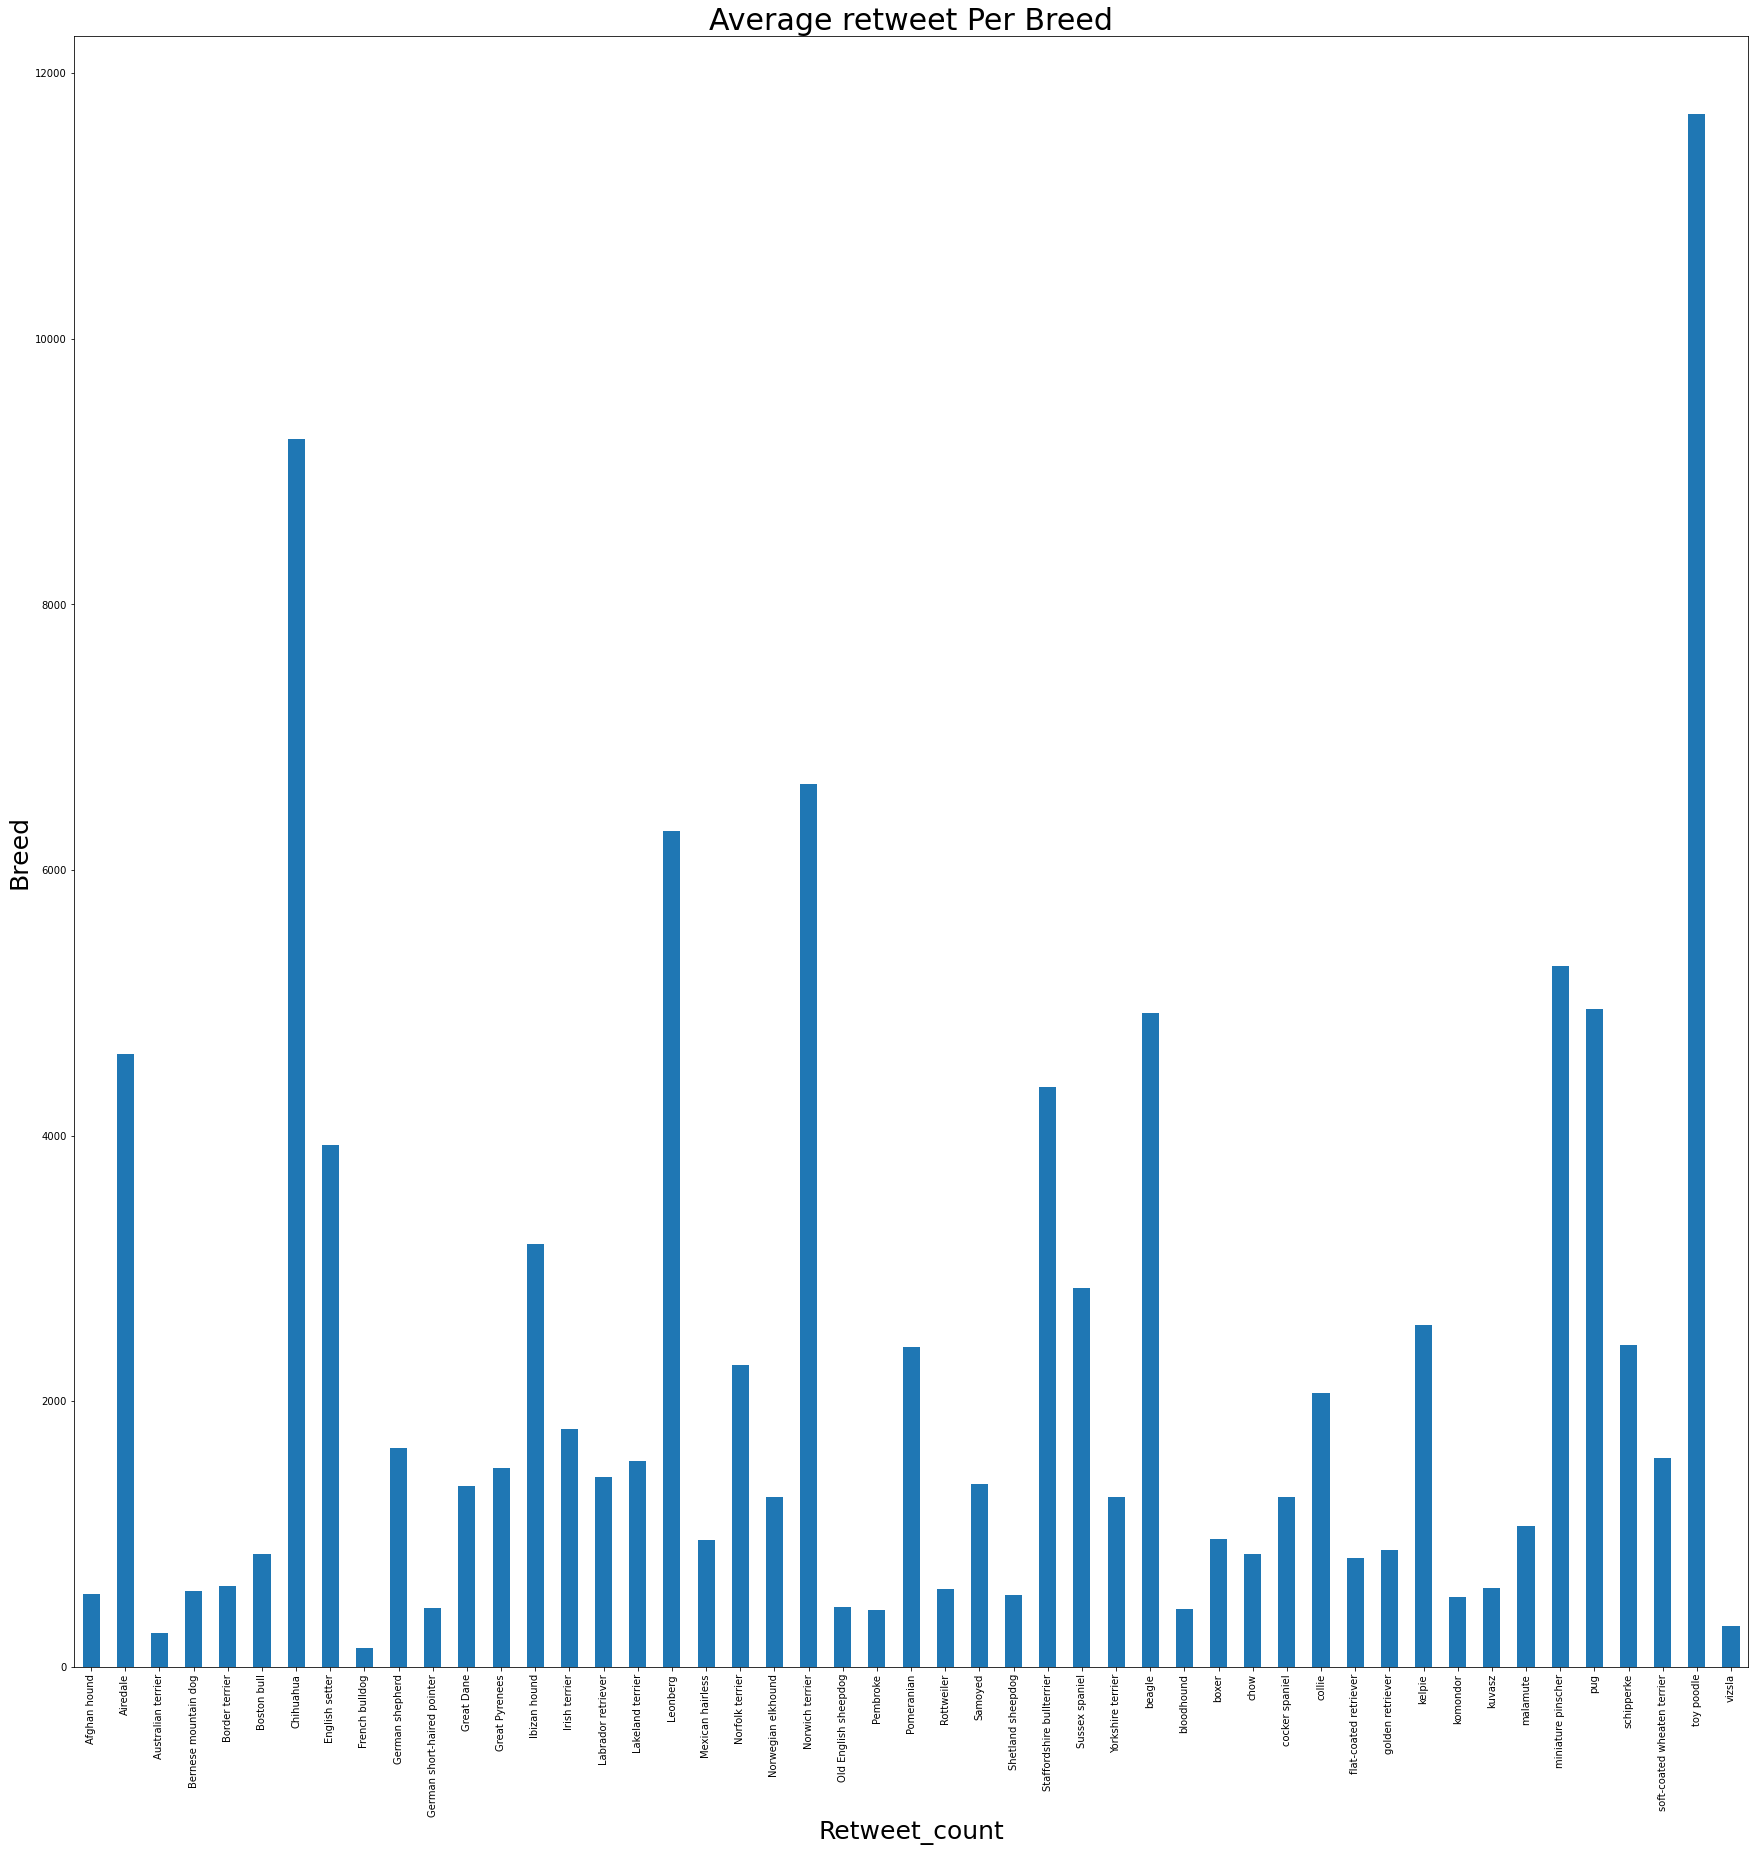

In [113]:
master_df.groupby(['breed'])['retweet_count'].mean().plot(kind="bar", figsize=(30,30));
plt.title('Average retweet Per Breed', fontsize=30)
plt.xlabel('Retweet_count', fontsize=25)
plt.ylabel('Breed', fontsize=25)
plt.show()

In [114]:
df_breed = master_df.groupby(['breed'],as_index=False)['favorite_count'].mean()
df_breed.sort_values('favorite_count', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,breed,favorite_count
43,miniature pinscher,29775.000000
47,toy poodle,28893.000000
7,English setter,22845.500000
1,Airedale,20905.000000
21,Norwich terrier,18739.000000
13,Ibizan hound,16923.000000
6,Chihuahua,15873.666667
28,Staffordshire bullterrier,15872.500000
44,pug,15578.000000
31,beagle,14710.000000


toy poodle has the highest  retweet

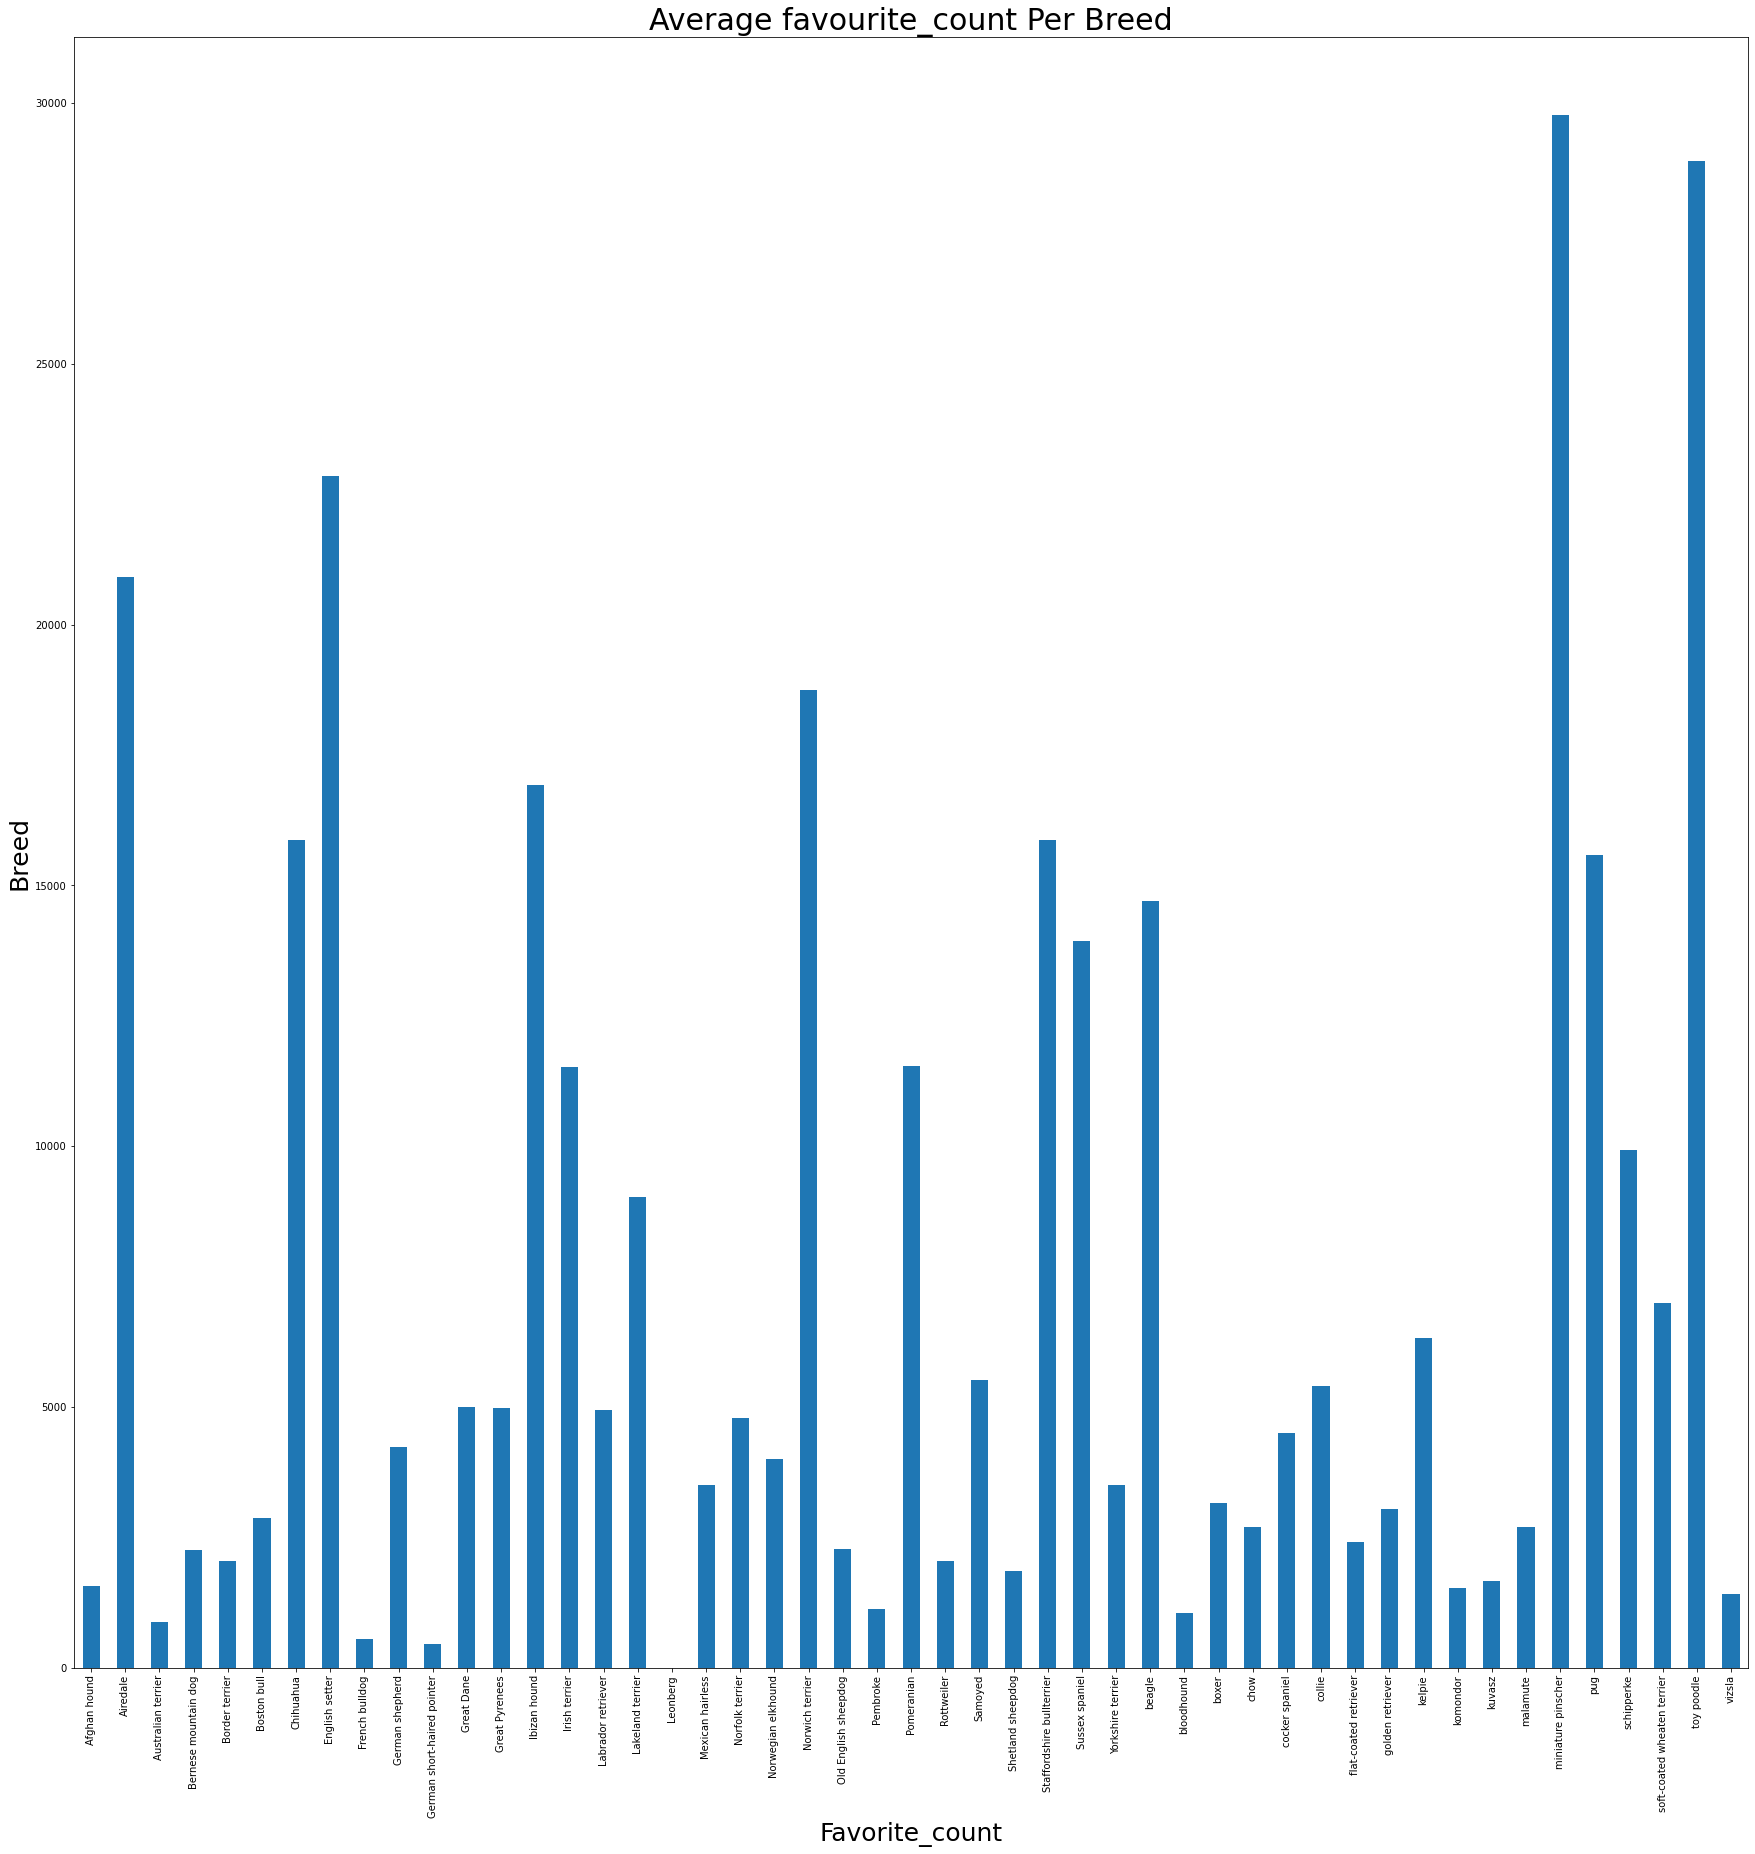

In [115]:
master_df.groupby(['breed'])['favorite_count'].mean().plot(kind="bar", figsize=(30,30));
plt.title('Average favourite_count Per Breed', fontsize=30)
plt.xlabel('Favorite_count', fontsize=25)
plt.ylabel('Breed', fontsize=25)
plt.show()

miniature pinscher has the highest favourite count

2. Correlation between retweet and favorite

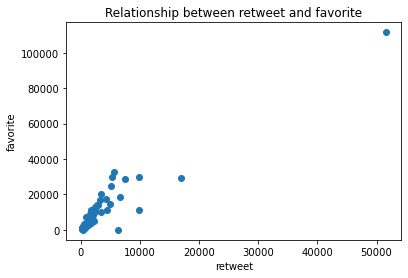

In [116]:
# x-axis
plt.xlabel('retweet')
# y-axis
plt.ylabel('favorite')
# Title of the histogram
plt.title('Relationship between retweet and favorite')
plt.scatter(master_df['retweet_count'], master_df['favorite_count'])
plt.show()

- There is a positive correlation between retweet and favorite
- The higher the retweet the higher the favorite

3. What slage are most dogs called

In [117]:
stage_count = pd.Series(master_df['stage']).value_counts(ascending = False)
stage_count

pupper     62
doggo      18
puppo       6
floofer     1
Name: stage, dtype: int64

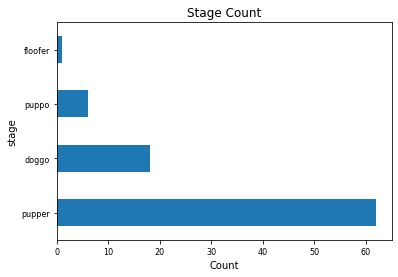

In [118]:
diagram = stage_count.plot.barh(fontsize = 8)
diagram.set(title = 'Stage Count')
diagram.set_xlabel('Count')
diagram.set_ylabel('stage')
plt.show()

Dogs with slangs pupper has the highest count

In [119]:
df_breed = master_df.groupby(['stage'],as_index=False)['favorite_count'].mean()
df_breed.sort_values('favorite_count', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,stage,favorite_count
1,floofer,32484.000000
0,doggo,11051.777778
3,puppo,8884.333333
2,pupper,6457.903226


In [120]:
df_breed = master_df.groupby(['stage'],as_index=False)['retweet_count'].mean()
df_breed.sort_values('retweet_count', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,stage,retweet_count
1,floofer,5526.000000
0,doggo,3045.333333
3,puppo,2758.833333
2,pupper,2366.064516


Dogs called puppo have the highest favourite and retweet count